### Import

In [1]:
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pyabf
import pandas as pd
from scipy.signal import medfilt
from scipy.signal import find_peaks
from sklearn.cluster import KMeans
from glob import glob
from figure1_func import extract_paired, filter_data, plot_two_panels,svd_2d, run_spike_sorting_analysis,_get_waveform, plot_mean_waveforms, plot_highlighted_AP_JP, plot_highlighted_peaks, peak_finding, kmeans_spike_sorting, plot_summary

In [2]:
lab_3_dir ='../data/1_CrayfishNeuromuscularJunction/lab3/'
all_lab3 = glob(lab_3_dir+'*')


### analysis

In [25]:
plt.style.use('default')


In [4]:
params={'x_lim':[.5,1.3], 'y_lim':False,
        'peak_finding':{'height':58,'distance':25}, 
        'splash_onset':False, 'k':4}

In [5]:
### run for medial, no splash


print('Crayfish NMJ lab: medial muscle')
med_file = lab_3_dir+'21915007'+'.abf'

med_non_edge_peaks, med_peaks_height, med_amp_clusters, med_times, med_filter_n, med_filter_m = run_spike_sorting_analysis(med_file, params)


Crayfish NMJ lab: medial muscle


In [95]:
pc_X = svd_2d(med_filter_n, med_non_edge_peaks)
    
pc_X.shape

(878, 3)

<Figure size 640x480 with 0 Axes>

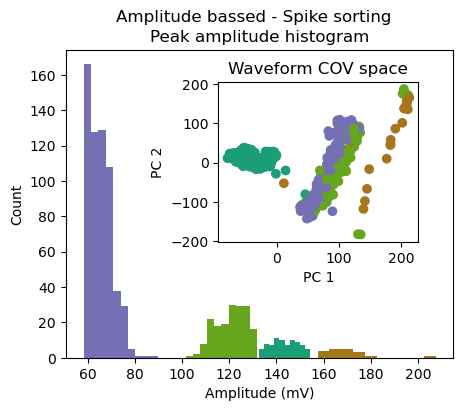

In [144]:
plt.set_cmap('Dark2')

fig = plt.figure(figsize=(5, 4))
plt.suptitle('Amplitude bassed - Spike sorting')

ax0 = fig.add_subplot()

ax0.set_title('Peak amplitude histogram')

ax0.hist([p for c,p in zip(med_amp_clusters,med_peaks_height) if c==0], color=colors[1], label='class 1')
ax0.hist([p for c,p in zip(med_amp_clusters,med_peaks_height) if c==1], color=colors[2], label='class 2')
ax0.hist([p for c,p in zip(med_amp_clusters,med_peaks_height) if c==2], color=colors[0], label='class 3')
ax0.hist([p for c,p in zip(med_amp_clusters,med_peaks_height) if c==3], color=colors[3], label='class 4')
ax0.set_xlabel('Amplitude (mV)')
ax0.set_ylabel('Count')

ax3 = fig.add_axes([0.43, 0.4, 0.4, 0.4])
ax3.set_title('Waveform COV space')

ax3.set_xlabel('PC 1')
ax3.set_ylabel('PC 2')

ax3.scatter(pc_X[:,0], pc_X[:,1], c=[colors[i] for i in med_amp_clusters])

plt.show()

<Figure size 640x480 with 0 Axes>

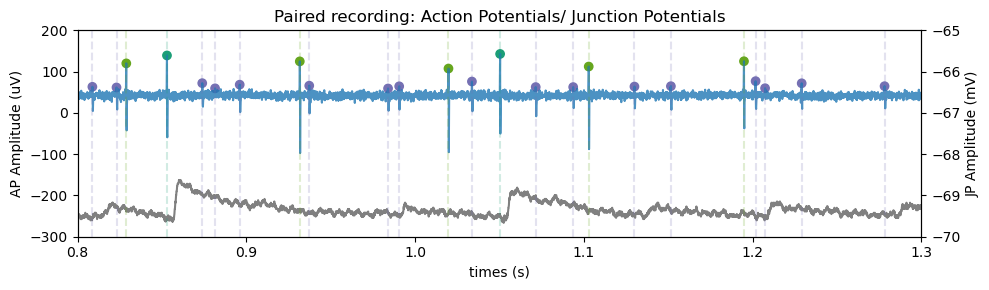

In [44]:
params['x_lim']=[.82,1.23]
plot_summary(med_non_edge_peaks, med_peaks_height, 
             med_amp_clusters, med_times, med_filter_n, 
             med_filter_m, params)


In [35]:
# ### run for lateral, no splash

# print('Crayfish NMJ lab: lateral muscle')

# lat_file = lab_3_dir+'21915008'+'.abf'
# lat_non_edge_peaks, lat_peaks_height, lat_amp_clusters, lat_times,lat_filter_n, lat_filter_m = run_spike_sorting_analysis(lat_file, params)


In [36]:
# params['x_lim']=[0.8,1.5]
# plot_summary(lat_non_edge_peaks, lat_peaks_height, 
#              lat_amp_clusters, lat_times, lat_filter_n, 
#              lat_filter_m, params)

## lat is so so intersting

In [100]:
# ### run for lateral, ipsi splash
params['peak_finding']={'height':48,'distance':25}

print('Crayfish NMJ lab: lateral muscle - splash ipsi')
lat_ipsi_file = lab_3_dir+'21915010'+'.abf'
lat_ipsi_non_edge_peaks, lat_ipsi_peaks_height, lat_ipsi_amp_clusters, lat_ipsi_times,lat_ipsi_filter_n, lat_ipsi_filter_m  = run_spike_sorting_analysis(lat_ipsi_file, params)



Crayfish NMJ lab: lateral muscle - splash ipsi


<Figure size 640x480 with 0 Axes>

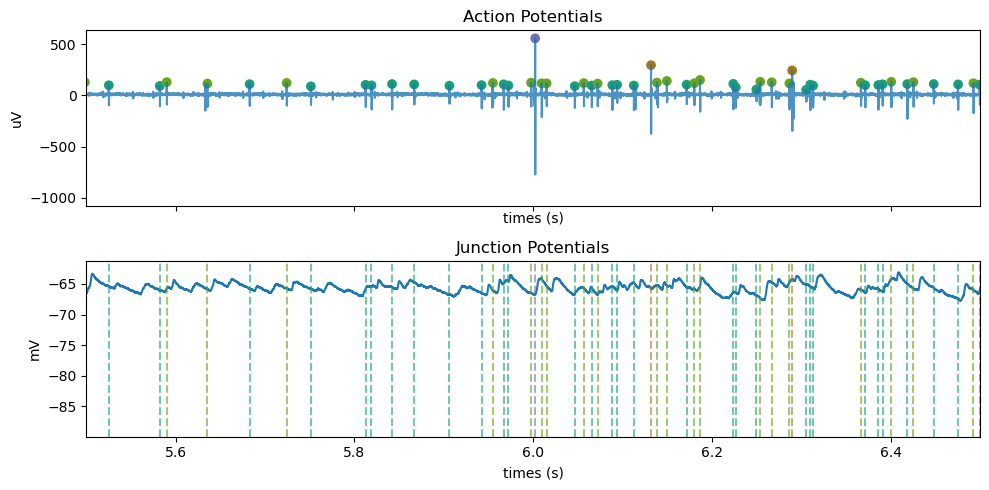

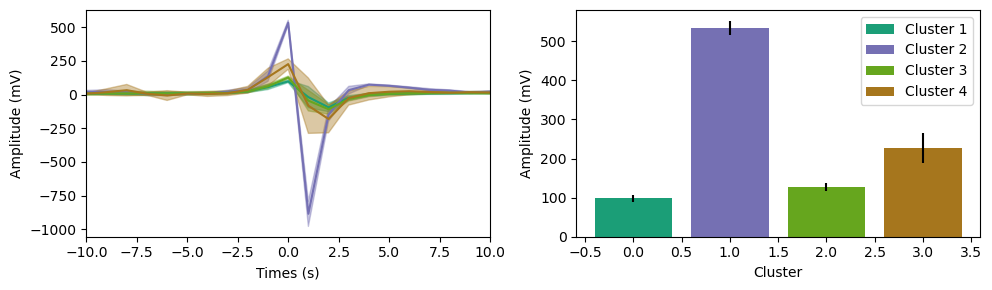

In [101]:
params['x_lim']=[5.5,6.5]
# params['y_lim']=[-69,-62]
# params['splash_onset']=5.9

plot_summary(lat_ipsi_non_edge_peaks, lat_ipsi_peaks_height, 
                lat_ipsi_amp_clusters, lat_ipsi_times,lat_ipsi_filter_n, 
                    lat_ipsi_filter_m , params)

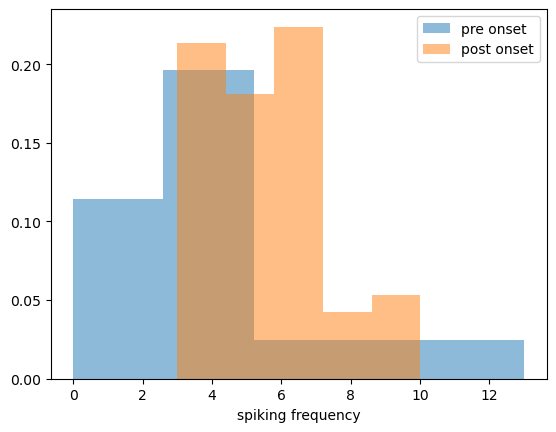

In [102]:
window=0.15
bins_ipsi = np.arange(0, 17, window)
onset_index_ipsi = np.abs(bins_ipsi - 7).argmin()
freq_ipsi = []
prev_bin = 0
for curr_bin in bins_ipsi:
    ids_in_bin = np.where((np.array(lat_ipsi_times[lat_ipsi_non_edge_peaks])>prev_bin) & (np.array(lat_ipsi_times[lat_ipsi_non_edge_peaks])<curr_bin))

    freq_ipsi.append(ids_in_bin[0].shape[0])
    prev_bin = curr_bin

plt.hist(freq_ipsi[:onset_index_ipsi], density=True, alpha=.5, bins=5, label = 'pre onset')
plt.hist(freq_ipsi[onset_index_ipsi:], density=True, alpha=.5, bins=5, label = 'post onset')
plt.xlabel('spiking frequency')
plt.legend()
plt.show()

In [51]:
# # ### run for lateral, contra splash

print('Crayfish NMJ lab: lateral muscle - splash contra')
params['peak_finding']={'height':[58,200],'distance':25}

lat_contra_file = lab_3_dir+'21915011'+'.abf'
lat_contra_non_edge_peaks, lat_contra_peaks_height, lat_contra_amp_clusters, lat_contra_times, lat_contra_filter_n, lat_contra_filter_m = run_spike_sorting_analysis(lat_contra_file, params)


Crayfish NMJ lab: lateral muscle - splash contra


<Figure size 640x480 with 0 Axes>

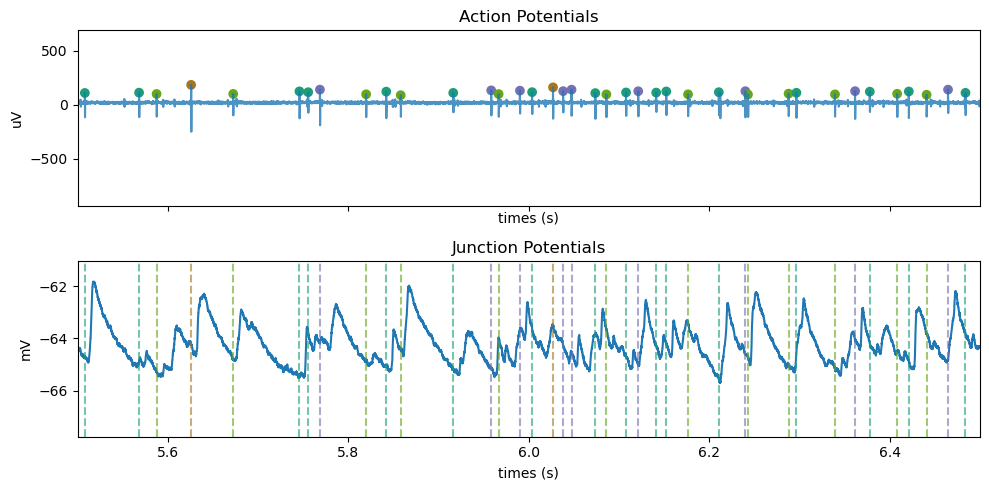

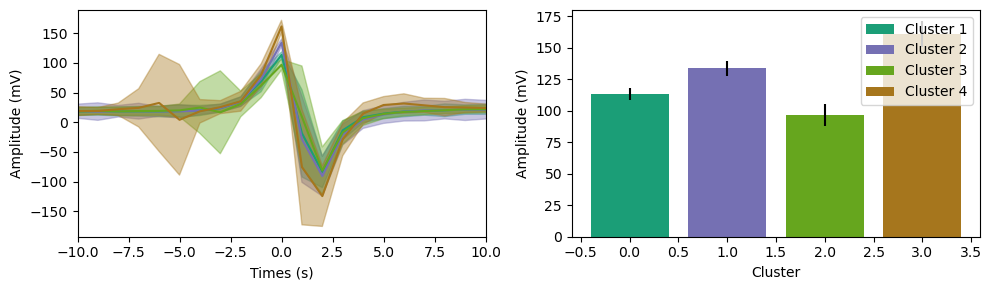

In [108]:
# params['x_lim']=[4,5]
# params['y_lim']=False
# params['splash_onset']=4.6

plot_summary(lat_contra_non_edge_peaks, lat_contra_peaks_height, lat_contra_amp_clusters, 
             lat_contra_times, lat_contra_filter_n, lat_contra_filter_m , params)

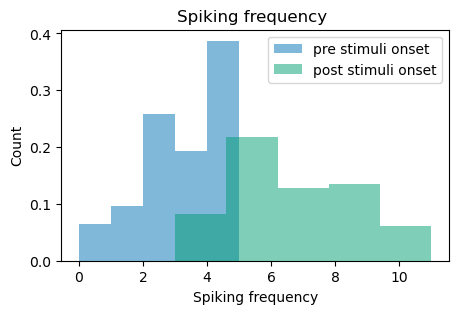

Ttest_indResult(statistic=8.099816587676143, pvalue=3.3114114355720394e-11)

In [145]:
plt.style.use('seaborn-colorblind')
plt.figure(figsize=(5,3))

window=0.15
bins_contra = np.arange(0, 17, window)
onset_index_contra = np.abs(bins_contra - 4.6).argmin()
freq_contra = []
prev_bin = 0
for curr_bin in bins_contra:
    ids_in_bin = np.where((np.array(lat_contra_times[lat_contra_non_edge_peaks])>prev_bin) &\
                          (np.array(lat_contra_times[lat_contra_non_edge_peaks])<curr_bin))

    freq_contra.append(ids_in_bin[0].shape[0])
    prev_bin = curr_bin
    
plt.hist(freq_contra[:onset_index_contra], density=True, alpha=.5, bins=5, label = 'pre stimuli onset')
plt.hist(freq_contra[onset_index_contra:], density=True, alpha=.5, bins=5, label = 'post stimuli onset')
plt.xlabel('Spiking frequency')
plt.ylabel('Count')

plt.legend()
plt.title('Spiking frequency ')
plt.show()

sp.stats.ttest_ind(freq_contra[onset_index_contra:onset_index_contra+31],
                   freq_contra[:onset_index_contra], 
                   equal_var=True)